In [1]:
import os

import cv2
from IPython.display import display
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

from faster_rcnn import network
from faster_rcnn.RPN import RPN # Hierarchical_Descriptive_Model

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [19]:
resume_model = 'output/trained_model/RPN_region_full_best.h5'

net = RPN(True)
network.load_net(resume_model, net)
net.cuda()
net.eval()

using k-means anchors
[Copied]: features.0.weight
[Copied]: features.0.bias
[Copied]: features.2.weight
[Copied]: features.2.bias
[Copied]: features.5.weight
[Copied]: features.5.bias
[Copied]: features.7.weight
[Copied]: features.7.bias
[Copied]: features.10.weight
[Copied]: features.10.bias
[Copied]: features.12.weight
[Copied]: features.12.bias
[Copied]: features.14.weight
[Copied]: features.14.bias
[Copied]: features.17.weight
[Copied]: features.17.bias
[Copied]: features.19.weight
[Copied]: features.19.bias
[Copied]: features.21.weight
[Copied]: features.21.bias
[Copied]: features.24.weight
[Copied]: features.24.bias
[Copied]: features.26.weight
[Copied]: features.26.bias
[Copied]: features.28.weight
[Copied]: features.28.bias
[Copied]: conv1.conv.weight
[Copied]: conv1.conv.bias
[Copied]: score_conv.conv.weight
[Copied]: score_conv.conv.bias
[Copied]: bbox_conv.conv.weight
[Copied]: bbox_conv.conv.bias
[Copied]: conv1_region.conv.weight
[Copied]: conv1_region.conv.bias
[Copied]: 

RPN (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU (inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU (inplace)
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU (inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU (inplace)
    (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [20]:
def image_resize(im, target_size=600, max_size=1000):
    """Builds an input blob from the images in the roidb at the specified
    scales.
    
    Adapted from the MSDN code (https://github.com/yikang-li/MSDN)
    at faster_rcnn/datasets/visual_genome_loader.py
    """
    im_shape = im.shape
    im_size_min = np.min(im_shape[0:2])
    im_size_max = np.max(im_shape[0:2])
    im_scale = float(target_size) / float(im_size_min)
    # Prevent the biggest axis from being more than MAX_SIZE
    if np.round(im_scale * im_size_max) > max_size:
        im_scale = float(max_size) / float(im_size_max)
    im = cv2.resize(im, None, None, fx=im_scale, fy=im_scale,
                    interpolation=cv2.INTER_LINEAR)

    return im, im_scale

In [21]:
# image transformation
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
        transforms.ToTensor(),
        normalize,
    ])

In [28]:
img_path = '/home/ubuntu/data/VG_100K/107899.jpg'
img = cv2.imread(img_path)
img, im_scale = image_resize(img)
img_info = np.array([img.shape[0], img.shape[1], im_scale], dtype=np.float32)
pimg = Image.fromarray(img)
img = transform(pimg)

In [47]:
object_rois = net(img.unsqueeze(dim=0),
                  np.expand_dims(img_info, axis=0),
                  None, None)[1][:, 1:].data.cpu().numpy()

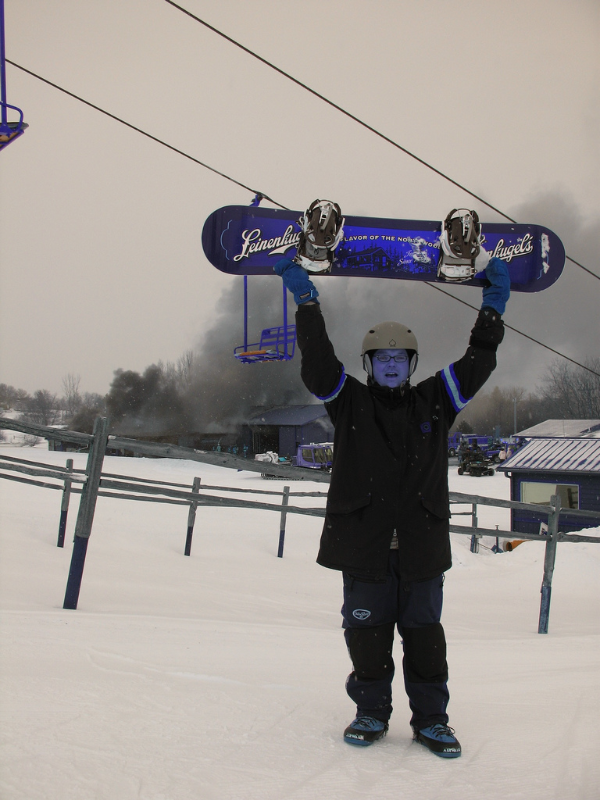

Original Image



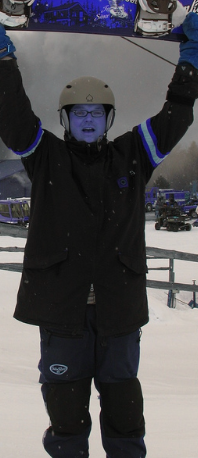

Crop 0



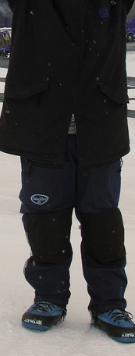

Crop 1



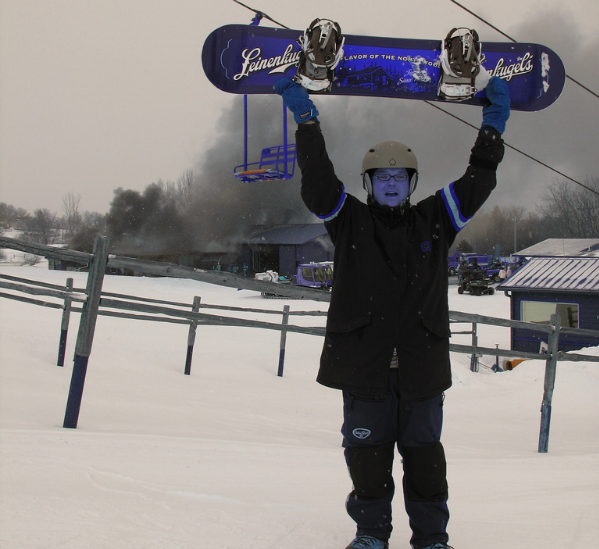

Crop 2



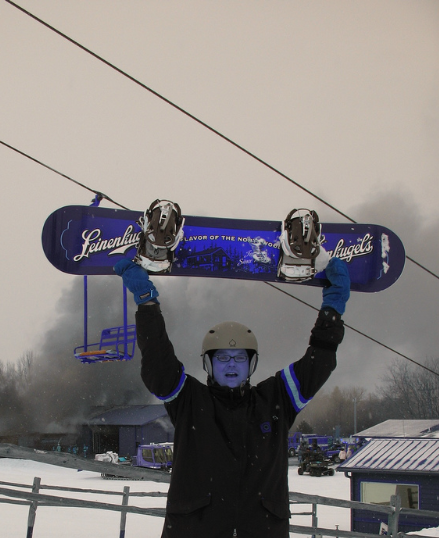

Crop 3



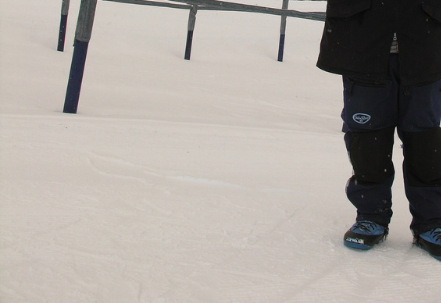

Crop 4



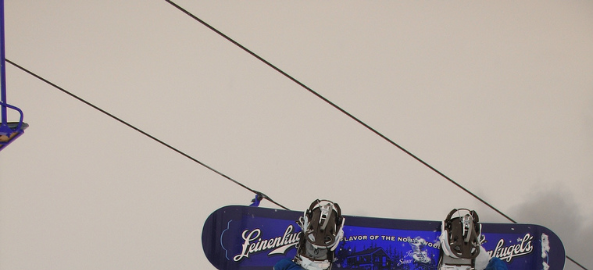

Crop 5



Crop 6



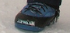

Crop 7



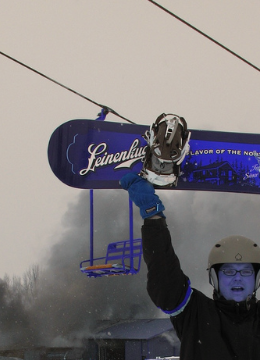

Crop 8



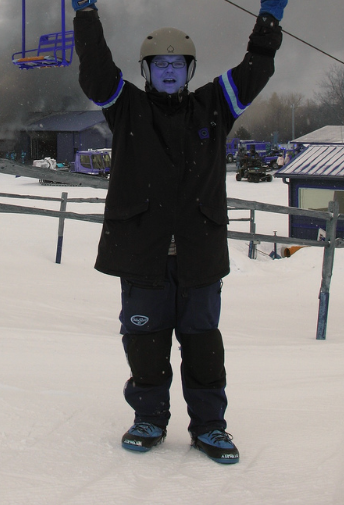

Crop 9



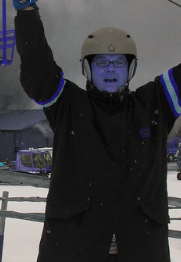

Crop 10



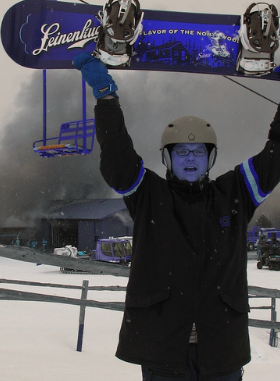

Crop 11



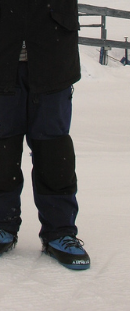

Crop 12



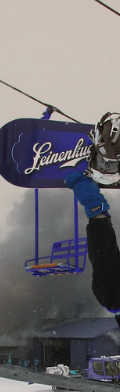

Crop 13



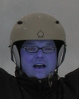

Crop 14



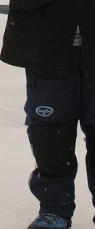

Crop 15



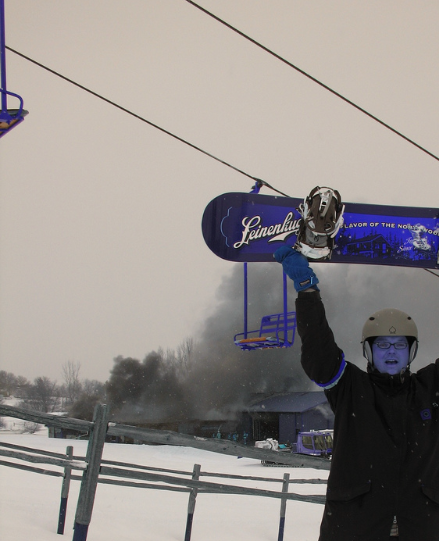

Crop 16



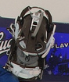

Crop 17



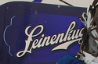

Crop 18



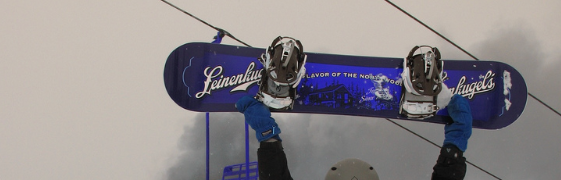

Crop 19



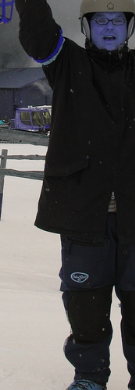

Crop 20



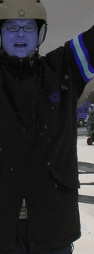

Crop 21



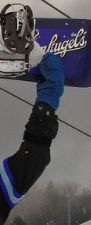

Crop 22



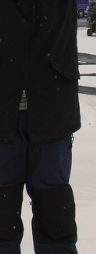

Crop 23



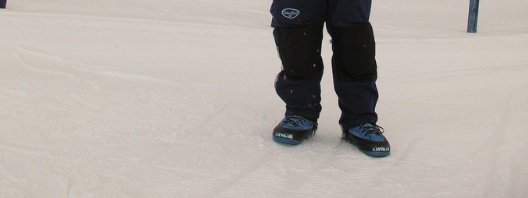

Crop 24



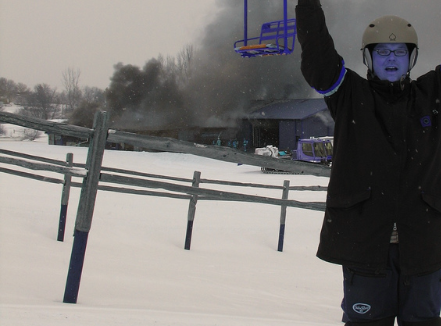

Crop 25



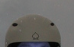

Crop 26



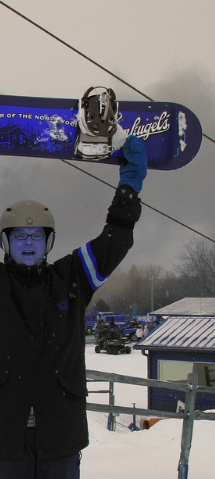

Crop 27



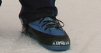

Crop 28



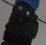

Crop 29



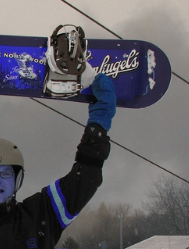

Crop 30



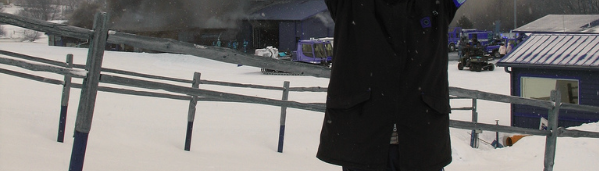

Crop 31



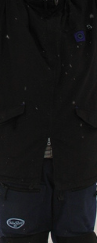

Crop 32



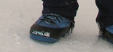

Crop 33



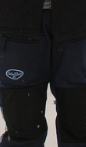

Crop 34



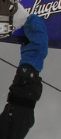

Crop 35



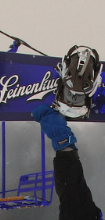

Crop 36



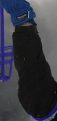

Crop 37



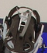

Crop 38



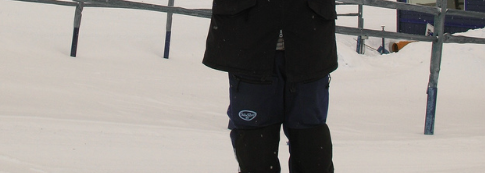

Crop 39



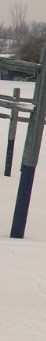

Crop 40



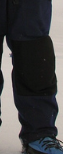

Crop 41



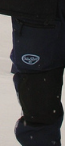

Crop 42



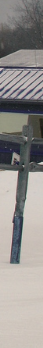

Crop 43



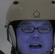

Crop 44



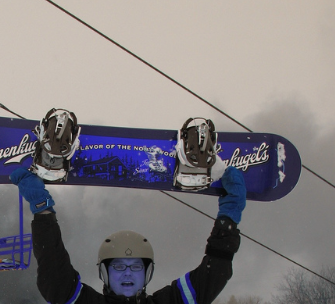

Crop 45



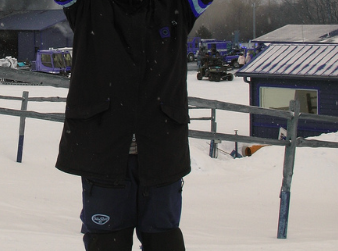

Crop 46



Crop 47



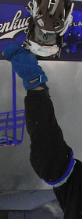

Crop 48



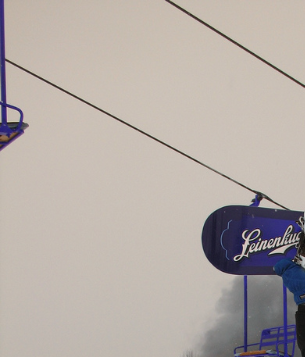

Crop 49



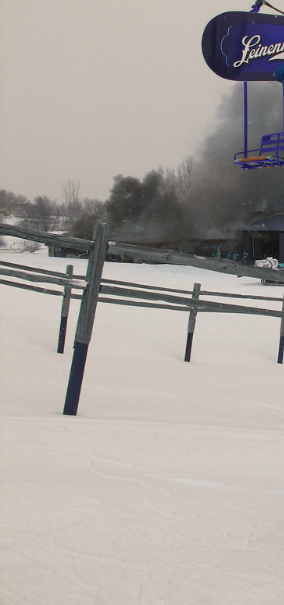

Crop 50



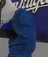

Crop 51



Crop 52



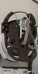

Crop 53



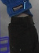

Crop 54



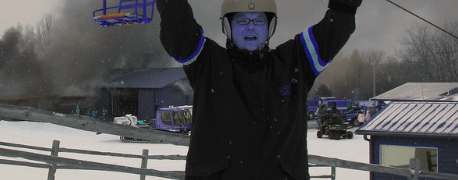

Crop 55



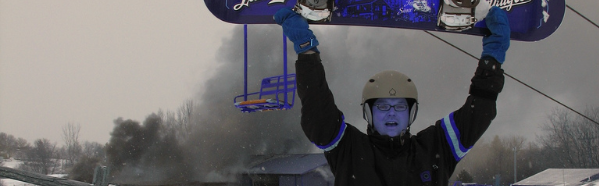

Crop 56



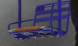

Crop 57



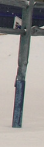

Crop 58



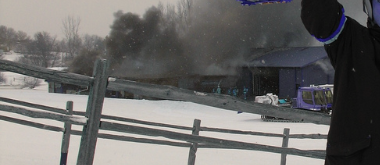

Crop 59



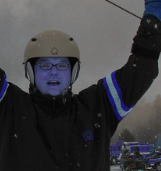

Crop 60



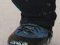

Crop 61



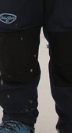

Crop 62



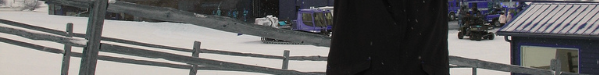

Crop 63



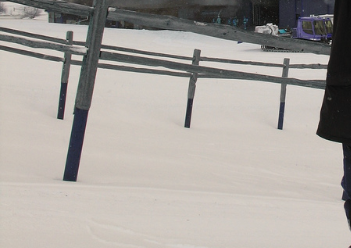

Crop 64



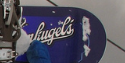

Crop 65



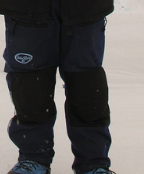

Crop 66



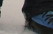

Crop 67



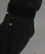

Crop 68



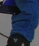

Crop 69



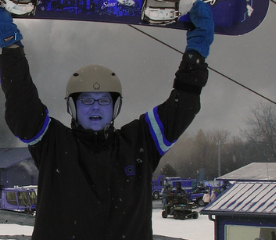

Crop 70



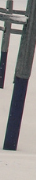

Crop 71



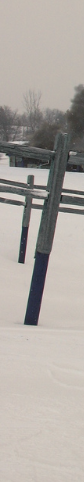

Crop 72



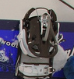

Crop 73



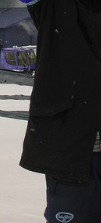

Crop 74



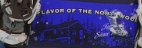

Crop 75



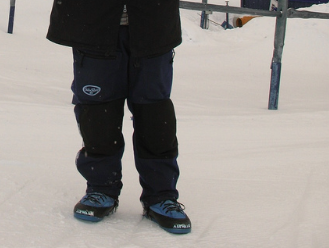

Crop 76



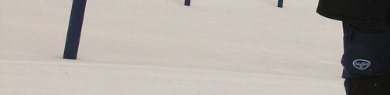

Crop 77



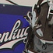

Crop 78



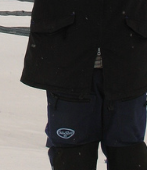

Crop 79



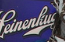

Crop 80



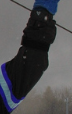

Crop 81



In [54]:
display(pimg)
print('Original Image\n')
for i, object_roi in enumerate(object_rois):
    cropped = pimg.crop(object_roi)
    display(cropped)
    print('Crop {}\n'.format(i))